
# <b>2º Evaluación Práctica</b>
---

## Paso 1: Obtención de datos desde APIs
---

In [1]:
#Importamos las librerías.
import requests # Nos sirve para hacer peticiones http a las apis.
import pandas as pd # Nos permite manejar los datos.
from dotenv import load_dotenv # Cargamos las variables de entorno desde el archivo .env
import os # Nos permite acceder a variables de entorno del sistema.

# Cargamos las API Keys desde el archivo .env
load_dotenv()

# Leemos las API Keys de .las variables de entorno.
IMDB_API_KEY = os.getenv("IMDB_API_KEY")
OMDB_API_KEY = os.getenv("OMDB_API_KEY")


# Verificamos que las API Keys se han cargado correctamente
if not IMDB_API_KEY:
    raise ValueError("ERROR: No se encontró la API Key de IMDb en el archivo .env")
if not OMDB_API_KEY:
    raise ValueError("ERROR: No se encontró la API Key de OMDb en el archivo .env")


# Creamos la funcion get para obtener las 100 mejores películas desde IMDb.
def get_imdb_movies(api_key):

    url = "https://imdb-top-100-movies.p.rapidapi.com/" # Url de la api de IMDb.
    headers = {
        "X-RapidAPI-Key": api_key, # Le damos nuestra API Key.
        "X-RapidAPI-Host": "imdb-top-100-movies.p.rapidapi.com" # Host de la api.
    }
    
    response = requests.get(url, headers=headers) # Hacemos la solicitud Get a la api.
    
    # Condición para comprobar si la respuesta ha salido bien, en caso de que no, mostramos mensaje de error.
    if response.status_code == 200:
        return response.json() # Convertimos la respuesta JSON en un diccionario de python.
    else:
        print(f"Error al obtener datos de IMDb: {response.status_code}")
        return None


# Creamos la función get_movie... para obtener detalles de actores y directores desde OMDb.
def get_movie_details(imdb_id):
    
    url = f"http://www.omdbapi.com/?i={imdb_id}&apikey={OMDB_API_KEY}" 
    response = requests.get(url) # Hacemos la solicitud get a la api 
    
    # Del mismo modo que la función anteriror creamos la condición, si la la respuesta sale bien, convertimos la respuesta en json.
    if response.status_code == 200:
        data = response.json()
        return {
            "Actors": data.get("Actors", "N/A"), # extraemos actores, si no hay devuelve N/a.
            "Director": data.get("Director", "N/A") # Extraemos directores, si no hay devuelve N/A.
        }
    return {"Actors": "N/A", "Director": "N/A"} # Si huviera errores devolvemos valores vacios.

# Obtenemos la lsita de películas desde IMDb API.
movies_data = get_imdb_movies(IMDB_API_KEY) # Llamamos a la función para obtener los datos.

# Condición, si IMDb devuelve datos.
if movies_data:
    enriched_movies = []# Creamos una lista vacía para guardar los datos con actores y directores.
    limit = 5  # Número máximo de películas a imprimir en la consola.
    count = 0  
    
    # Creamos un bucle for para recorrer todas las películas obtenidas.
    for movie in movies_data:  
        imdb_id = movie["imdbid"]
        extra_data = get_movie_details(imdb_id)  # Obtiene Actores y Directores desde OMDb.

        # Cremaos el diccionario con los datos originales que extrae IMDb y añadimos de OMDb los actores y directores.
        enriched_movie = {
            "rank": movie["rank"],
            "title": movie["title"],
            "description": movie["description"],
            "image": movie["image"],
            "big_image": movie["big_image"],
            "genre": movie["genre"],
            "thumbnail": movie["thumbnail"],
            "rating": movie["rating"],
            "id": movie["id"],
            "year": movie["year"],
            "imdbid": movie["imdbid"],
            "imdb_link": movie["imdb_link"],
            "director": extra_data["Director"],  # Nuevo campo director de OMDb.
            "actors": extra_data["Actors"]  # Nuevo campo actores de Omdb.
        }
        enriched_movies.append(enriched_movie)

        # Para evitar que se muestren en la consola todos los datos añadidos, creamos un limite de 5.
        if count < limit:
            print(f"Datos añadidos para {movie['title']}") # Log para comprobar que se han añadido los datos correctamente.
            count += 1  # Aumentamos el contador para controlar la impresión.
            

    # Guardamos en CSV y JSON
    df_movies = pd.DataFrame(enriched_movies) # Convertimos la lista de películas en un dataframe .
    df_movies.to_csv("../data/top_100_movies.csv", index=False) # Guardamos en csv.
    df_movies.to_json("../data/top_100_movies.json", orient="records", indent=4) # Guardamso en .json para comprobar si fuese necesario.

    print("\nDatos guardados en 'top_100_movies.csv' y 'top_100_movies.json' con Actores y Directores.")

    # Mostrar los primeros 5 resultados para verificar que los datos se han guardado correctamente.
    print("\nPrimeras 5 películas obtenidas:")
    for movie in enriched_movies[:5]: # Solo las primeras 5 películas.
        print(f"Título: {movie['title']}, Año: {movie['year']}, Director: {movie['director']}, Actores: {movie['actors']}, Rating: {movie['rating']}")

else:
    print("No se pudieron obtener datos de IMDb.") # Log para en caso de que Imbd falle.


Datos añadidos para The Shawshank Redemption
Datos añadidos para The Godfather
Datos añadidos para The Dark Knight
Datos añadidos para The Godfather Part II
Datos añadidos para 12 Angry Men

Datos guardados en 'top_100_movies.csv' y 'top_100_movies.json' con Actores y Directores.

Primeras 5 películas obtenidas:
Título: The Shawshank Redemption, Año: 1994, Director: Frank Darabont, Actores: Tim Robbins, Morgan Freeman, Bob Gunton, Rating: 9.3
Título: The Godfather, Año: 1972, Director: Francis Ford Coppola, Actores: Marlon Brando, Al Pacino, James Caan, Rating: 9.2
Título: The Dark Knight, Año: 2008, Director: Christopher Nolan, Actores: Christian Bale, Heath Ledger, Aaron Eckhart, Rating: 9.0
Título: The Godfather Part II, Año: 1974, Director: Francis Ford Coppola, Actores: Al Pacino, Robert De Niro, Robert Duvall, Rating: 9.0
Título: 12 Angry Men, Año: 1957, Director: Sidney Lumet, Actores: Henry Fonda, Lee J. Cobb, Martin Balsam, Rating: 9.0


---
## Paso 1.2: Obtener Calificaciones desde OMDb API y Normalizarlas
---

---
- IMDb utiliza una escala de 0 a 10, "9.3/10" se convierte en 9.3.
- Rotten Tomatoes usa un porcentaje, "89%" se convierte en 8.9 dividiendo entre 10.
- Metacritic usa una escala de 0 a 100, "82/100" se convierte en 8.2 dividiendo entre 10.

---

In [2]:
# Verificar que la API Key se cargó correctamente
if not OMDB_API_KEY:
    raise ValueError("ERROR: No se encontró la API Key de OMDb en el archivo .env")


# Creamos la función get para obtener las calificacines de las películas, a partir de su IMBd ID.
def get_omdb_ratings(OMDB_API_KEY, imdb_id):

    url = f"http://www.omdbapi.com/?i={imdb_id}&apikey={OMDB_API_KEY}" # Creamos la Url con el imdb id.
    response = requests.get(url) # Hacemos la petición a Get.
    
    if response.status_code == 200: # Del mismo modo que la función anteriror creamos la condición, si la la respuesta sale bien, convertimos la respuesta en json.
        data = response.json()
        return data.get("Ratings", [])  # Devuelve la lista de calificaciones y si no hay la devuelve vacía.
    else:
        print(f"Error al obtener datos para {imdb_id}: {response.status_code}") # En caso de no extraer los datos o algún otro tipo de problema, imprimimos el error.
        return None


# Creamos la función para normalizar los rating.
def normalize_rating(source, value):
    # Utilizamos split para extraer el número de IMDB y metratic y para rotten tomato replace("%", "") para convertirlo a decimal.
    if source == "Internet Movie Database":
        return float(value.split("/")[0])  # Ejemplo: "9.3/10" → 9.3
    elif source == "Rotten Tomatoes":
        return float(value.replace("%", "")) / 10  # Ejemplo: "89%" → 8.9 : Eliminamos el % y dividimos entre 10.
    elif source == "Metacritic":
        return float(value.split("/")[0]) / 10  # Ejemplo: "82/100" → 8.2 : Extraemos el número antes del /100 y dividimos entre 10.
    return None  # Si la fuente no es reconocida, devuelve None

# Cargamos el archivo CSV con las películas
file_path = "../data/top_100_movies.csv"  # Lee el archivo que contienen las películas.
df_movies = pd.read_csv(file_path) # y guardamos los datos en el dataFrame.

# Verificar que la columna del IMDb ID existe y tiene valores correctos.
if "imdbid" not in df_movies.columns: # si no emcuemtra la columna imbdid muestra el error.
    print("ERROR: La columna 'imdbid' no está en el CSV. Verifica los datos.")
else:
    # Filtramos solo IMDb IDs válidos (que empiecen con 'tt')
    df_movies = df_movies[df_movies["imdbid"].astype(str).str.startswith("tt")]

    if df_movies.empty:# Si después del filtro la lista está vacia, se muestra el error.
        print("ERROR: No se encontraron IMDb IDs válidos en el CSV.")
    else: 
        # Creamos una lista para almacenar los ratings normalizados.
        ratings_data = {}

        df_movies_subset = df_movies
        
        # Obtener los ratings de OMDb API y normalizarlos.
        for index, row in df_movies_subset.iterrows():
            imdb_id = row["imdbid"]  # IMDb ID real de la película.
            ratings = get_omdb_ratings(OMDB_API_KEY, imdb_id) # Llamamos a la Api para obtener los ratings.
            
            rating_imdb, rating_RT, rating_metacritic = None, None, None
            
            if ratings: # Si la api devuelve resultado, lo procesamos.
                
                for rating in ratings:
                    normalized_value = normalize_rating(rating["Source"], rating["Value"]) # Convertimos la calificación o rating a valor entre 0-10.
                    
                    # Asignamos los valores normalizados a su respectiva fuente
                    if rating["Source"] == "Internet Movie Database":
                        rating_imdb = normalized_value
                    elif rating["Source"] == "Rotten Tomatoes":
                        rating_RT = normalized_value
                    elif rating["Source"] == "Metacritic":
                        rating_metacritic = normalized_value
                        
                      # Calculamos el rating normalizado como promedio de los valores disponibles
                    available_ratings = [r for r in [rating_imdb, rating_RT, rating_metacritic] if r is not None]
                    normalized_rating = round(sum(available_ratings) / len(available_ratings), 2) if available_ratings else None
              
                    ratings_data[imdb_id] = { #Guardamos los datos en la lista.
                            "imdb_id": imdb_id, # Id de la película.
                            "title": row["title"], 
                            "rating_imdb": rating_imdb,
                            "rating_RT": rating_RT,
                            "rating_metacritic": rating_metacritic,
                            "promedio_rating": normalized_rating # Proemdio de los ratings.
                        }
                    if len([r for r in [rating_imdb, rating_RT, rating_metacritic] if r is not None]) >= 3:
                        print(f"\nCalificaciones para {row['title']} ({row['year']}):") # Imprimimos en consola 
                        print(f"  IMDb: {rating_imdb}, RT: {rating_RT}, Metacritic: {rating_metacritic} → Promedio: {normalized_rating}")
                    
            else:
                print(f"No se encontraron calificaciones para {row['title']}") # En caso de no encontrar datos se muestra el error.

        # Convertimos los datos a un DataFrame y guardamos en un CSV.
        df_ratings = pd.DataFrame(ratings_data.values())
        df_ratings.to_csv("../data/normalizar_ratings.csv", index=False)

        print("\nCalificaciones normalizadas y guardadas en 'normalizar_ratings.csv'.")



Calificaciones para The Shawshank Redemption (1994):
  IMDb: 9.3, RT: 8.9, Metacritic: 8.2 → Promedio: 8.8

Calificaciones para The Godfather (1972):
  IMDb: 9.2, RT: 9.7, Metacritic: 10.0 → Promedio: 9.63

Calificaciones para The Dark Knight (2008):
  IMDb: 9.0, RT: 9.4, Metacritic: 8.4 → Promedio: 8.93

Calificaciones para The Godfather Part II (1974):
  IMDb: 9.0, RT: 9.6, Metacritic: 9.0 → Promedio: 9.2

Calificaciones para 12 Angry Men (1957):
  IMDb: 9.0, RT: 10.0, Metacritic: 9.7 → Promedio: 9.57

Calificaciones para Schindler's List (1993):
  IMDb: 9.0, RT: 9.8, Metacritic: 9.5 → Promedio: 9.43

Calificaciones para The Lord of the Rings: The Return of the King (2003):
  IMDb: 9.0, RT: 9.4, Metacritic: 9.4 → Promedio: 9.27

Calificaciones para Pulp Fiction (1994):
  IMDb: 8.9, RT: 9.2, Metacritic: 9.5 → Promedio: 9.2

Calificaciones para The Lord of the Rings: The Fellowship of the Ring (2001):
  IMDb: 8.9, RT: 9.2, Metacritic: 9.2 → Promedio: 9.1

Calificaciones para The Good,

---
## Paso 2: Obtención de reseñas de usuarios y análisis de sentimientos, para ello empleamos TMDb API.
---

In [3]:
from textblob import TextBlob # Importmaos para ánalisis de sentimiento.

# Cargamos la API Key del archivo .env.
TMDB_API_KEY = os.getenv("TMDB_API_KEY")

# Definimos la función para obtener las reseñas de usuarios desde TMBd usando el imdb id.
def get_movie_reviews(imdb_id, max_reviews=3):
    
    url = f"https://api.themoviedb.org/3/find/{imdb_id}" # Construimos la url para buscar el tmbd id basado en el imbd id.
    params = {
        "api_key": TMDB_API_KEY,
        "external_source": "imdb_id" #Le decimos que buscamos por imbd id.
    }
    
    # Hacemos la solicitud get a la api de tmdb para obtener el tmdb id de la película.
    response = requests.get(url, params=params)
    
    if response.status_code == 200: 
        data = response.json()
        
        # Obtener el ID de TMDb correspondiente si existe.
        if "movie_results" in data and len(data["movie_results"]) > 0:
            tmdb_id = data["movie_results"][0]["id"] # Id de la película en tmdb.
            
            # Creamos la url para obtener reseñas de TMDb.
            reviews_url = f"https://api.themoviedb.org/3/movie/{tmdb_id}/reviews"
            reviews_params = {"api_key": TMDB_API_KEY}
            reviews_response = requests.get(reviews_url, params=reviews_params) # Hacemos la solicitud get para obtener las reseñas.
            
            if reviews_response.status_code == 200:
                reviews_data = reviews_response.json()
                return reviews_data.get("results", [])[:max_reviews]  # Tomamos las primeras 'max_reviews' reseñas.
    
    return None  # Si no hay reseñas

# Creamos la función para analizar el sentimiento de un texto usando TextBlob, -1 negativo a 1 positivo.
def analyze_sentiment(text):

    blob = TextBlob(text) # Creamos el objeto Textblob con el texto de la reseña.
    return blob.sentiment.polarity # Extraemos la polaridad del sentimiento.

# Cargamos las películas desde el CSV de ratings para obtener los IMDb IDs
movies_csv = "../data/top_100_movies.csv"
df_movies = pd.read_csv(movies_csv)

# Lista para almacenar las reseñas y los análisis de sentimiento.
reviews_data = []

# Obtenemos las reseñas para cada película en el top 100 (máx. 3 reseñas por película).
for index, row in df_movies.iterrows():
    imdb_id = row["imdbid"] # Extraemos el IMDB ID de la película.
    title = row["title"] # Extraemos el título de la película.
    reviews = get_movie_reviews(imdb_id, max_reviews=3)  # Llamamos a la función get para obtener reseñas, dando un límite de 3 reseñas.
    
    if reviews: # Si encuentra reseñas las procesamos.
        print(f"{len(reviews)} reseñas obtenidas para {title}") # Imprimimos el número de reseñas obtenidas para cada película.
        for review in reviews:
            text = review["content"] # Extraemos el contenido de la reseña.
            sentiment = analyze_sentiment(text) # Analizamos el sentimiento del texto de la reseña.add()
            
            # Y almacenamos en una lista.
            reviews_data.append({
                "imdb_id": imdb_id,
                "title": title,
                "review_text": text,
                "sentiment_score": sentiment
            })
    else:
        print(f"No se encontraron reseñas para {title}") # Si no hay reseñas para alguna película se muestra este mensaje.

# Guardamos las reseñas y el analisis de sentimiento en un archivo CSV
df_reviews = pd.DataFrame(reviews_data)
df_reviews.to_csv("../data/movie_reseñas.csv", index=False)

print("\nReseñas y análisis de sentimiento guardados en 'movie_reseñas.csv'.")

3 reseñas obtenidas para The Shawshank Redemption
3 reseñas obtenidas para The Godfather
3 reseñas obtenidas para The Dark Knight
3 reseñas obtenidas para The Godfather Part II
3 reseñas obtenidas para 12 Angry Men
3 reseñas obtenidas para Schindler's List
3 reseñas obtenidas para The Lord of the Rings: The Return of the King
3 reseñas obtenidas para Pulp Fiction
3 reseñas obtenidas para The Lord of the Rings: The Fellowship of the Ring
3 reseñas obtenidas para The Good, the Bad and the Ugly
3 reseñas obtenidas para Forrest Gump
3 reseñas obtenidas para Fight Club
3 reseñas obtenidas para The Lord of the Rings: The Two Towers
3 reseñas obtenidas para Inception
3 reseñas obtenidas para Star Wars: Episode V - The Empire Strikes Back
3 reseñas obtenidas para The Matrix
3 reseñas obtenidas para Goodfellas
3 reseñas obtenidas para Spider-Man: Across the Spider-Verse
3 reseñas obtenidas para Interstellar
3 reseñas obtenidas para One Flew Over the Cuckoo's Nest
3 reseñas obtenidas para Se7en


--- 

## Ampliación: Obtener Plataformas de Streaming donde ver las películas con TMDb.

---

In [4]:
# Creamos la función get que obtiene las plataformas de streaming donde está disponible una película usando TMDb API.
def get_streaming_providers(imdb_id):
    
    # Obtenemos el ID de TMDb a partir del IMDb ID.
    url = f"https://api.themoviedb.org/3/find/{imdb_id}"
    params = {"api_key": TMDB_API_KEY, "external_source": "imdb_id"} # Parámetros para la busqueda.
    find_response = requests.get(url, params=params) # Hacemos la solicitud get.
    
    if find_response.status_code == 200:
        find_data = find_response.json()
        if "movie_results" in find_data and len(find_data["movie_results"]) > 0: # Extraemos el id de tmdb si la pelicula existe en tmdb.
            tmdb_id = find_data["movie_results"][0]["id"] # Id de TMDb de la película si existiese.
            
            # Obtenemos las plataformas de streaming de la película.
            plataformas_url = f"https://api.themoviedb.org/3/movie/{tmdb_id}/watch/providers"
            plataformas_params = {"api_key": TMDB_API_KEY}
            plataformas_response = requests.get(plataformas_url, params=plataformas_params) #Hacemos la solictud get.
            
            if plataformas_response.status_code == 200:
                providers_data = plataformas_response.json().get("results", {})
                
                # Extraer datos para en nuestro caso España.
                if "ES" in providers_data and "flatrate" in providers_data["ES"]:
                    platforms = [provider["provider_name"] for provider in providers_data["ES"]["flatrate"]] # Lista de nombres de plataformas.
                    return platforms  # Devuelve la lista de plataformas disponibles. 
    
    return None  # Si no hay plataformas disponibles, devovlemos none.

# Cargar la lista de películas desde CSV
movies_csv = "../data/top_100_movies.csv"
df_movies = pd.read_csv(movies_csv)

# Lista para almacenar las plataformas de streaming
streaming_data = []

# Obtener plataformas para cada película
for index, row in df_movies.iterrows():
    imdb_id = row["imdbid"] # Extraemos el imdb id de la pelicula.
    title = row["title"] # y el título de la pelicula.
    platforms = get_streaming_providers(imdb_id) # Llamamos a la función para obtener las plataformas.
    
    if platforms: # Condición, si encontramos la plataforma
        print(f"{title} está disponible en: {', '.join(platforms)}") # Ponemos en consola un mensaje como que hay plataforma disponible para esa película.
        for platform in platforms:
            streaming_data.append({
                "imdb_id": imdb_id, # Guardamos imdb id de la película. 
                "title": title, # guardamos el titulo.
                "platform": platform # y guardamos la plataforma donde está disponible.
            })
    else: # Si no hay plataforma disponible se muestra el siguiente mensaje.
        print(f"{title} no tiene plataformas de streaming disponibles.")
        streaming_data.append({  # Guardamos con None si no tiene plataformas disponibles.
            "imdb_id": imdb_id,
            "title": title,
            "platform": None
        })

# Guardamos las plataformas junto con el titutlo y el id en un archivo CSV.
df_streaming = pd.DataFrame(streaming_data)
df_streaming.to_csv("../data/plataformas_streaming_movies.csv", index=False)

print("\nDatos de plataformas guardados en 'plataformas_streaming_movies.csv' incluyendo None para las que no tienen plataformas.")


The Shawshank Redemption está disponible en: Netflix, Movistar Plus+, Movistar Plus+ Ficción Total , Filmin, Max, Netflix Standard with Ads
The Godfather está disponible en: Movistar Plus+ Ficción Total , SkyShowtime, Max
The Dark Knight está disponible en: Netflix, Amazon Prime Video, Movistar Plus+ Ficción Total , Max, Netflix Standard with Ads
The Godfather Part II está disponible en: Movistar Plus+ Ficción Total , SkyShowtime, Max
12 Angry Men está disponible en: Filmin, MGM Plus Amazon Channel
Schindler's List está disponible en: Movistar Plus+, Movistar Plus+ Ficción Total , Filmin, SkyShowtime
The Lord of the Rings: The Return of the King está disponible en: Amazon Prime Video, Movistar Plus+ Ficción Total , Max, Tivify
Pulp Fiction está disponible en: Movistar Plus+ Ficción Total , SkyShowtime, Max
The Lord of the Rings: The Fellowship of the Ring está disponible en: Amazon Prime Video, Movistar Plus+ Ficción Total , Max, Tivify
The Good, the Bad and the Ugly está disponible en

---

##  Ampliación: Obtener datos de Recaudación en Taquilla y Presupuesto, con TMDb.

---

In [5]:
# Creamos la función get para obtener presupuesto y recaudación de una película con TMDb API.
def get_movie_boxoffice(imdb_id):
    # Obtener el ID de TMDb a partir del IMDb ID
    url = f"https://api.themoviedb.org/3/find/{imdb_id}" # Url para obtener los datos.
    find_params = {"api_key": TMDB_API_KEY, "external_source": "imdb_id"}
    find_response = requests.get(url, params=find_params) # Hacemos la solicitud get.
    
    if find_response.status_code == 200:
        find_data = find_response.json()
        # Si existe la pelicula extraemos el id de tmdb en TMdb.
        if "movie_results" in find_data and len(find_data["movie_results"]) > 0:
            tmdb_id = find_data["movie_results"][0]["id"]
            
            # Obtenemo datos de presupuesto y recaudación.
            movie_url = f"https://api.themoviedb.org/3/movie/{tmdb_id}" #Url para detalles de la película.
            movie_params = {"api_key": TMDB_API_KEY}
            movie_response = requests.get(movie_url, params=movie_params) #Hacemos la solicitud get.
            
            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                # Extraemos los datos de presupuesto y gnancias en la recaudación.
                budget = movie_data.get("budget", 0)  # Presupuesto
                revenue = movie_data.get("revenue", 0)  # Recaudación
                
                return {
                    "imdb_id": imdb_id,
                    "budget": budget, # Presupuesto en dolares.
                    "box_office": revenue, # Recaudación en dolares.
                    "currency": "USD" # Expecificamos que la moneda es en dolares.
                }
    return None  # Si no se encuentra información devolvemos none.

# Cargar la lista de películas desde CSV
movies_csv = "../data/top_100_movies.csv"
df_movies = pd.read_csv(movies_csv)

# Lista para almacenar los datos de presupuesto y recaudación.
boxoffice_data = []

# Obtenemos los datos de presupuesto y recaudación de cada película.
for index, row in df_movies.iterrows():
    imdb_id = row["imdbid"]
    title = row["title"]
    data = get_movie_boxoffice(imdb_id) # Llamamos a la función para obtener los datos
    
    if data: # condición, si hay datos imprimimos el siguiente mensaje.
        print(f"Datos obtenidos para {title}: Budget={data['budget']}, Revenue={data['box_office']}")
        boxoffice_data.append(data)
    else: # Si no encuentra datos devolvemos el siguiente mensaje.
        print(f"No se encontraron datos de taquilla para {title}.")

# Guardamos los datos en un archivo CSV
df_boxoffice = pd.DataFrame(boxoffice_data)
df_boxoffice.to_csv("../data/taquillazo_movies.csv", index=False)

print("\nDatos de taquilla y presupuesto guardados en 'taquillazo_movies.csv'.")


Datos obtenidos para The Shawshank Redemption: Budget=25000000, Revenue=28341469
Datos obtenidos para The Godfather: Budget=6000000, Revenue=245066411
Datos obtenidos para The Dark Knight: Budget=185000000, Revenue=1004558444
Datos obtenidos para The Godfather Part II: Budget=13000000, Revenue=102600000
Datos obtenidos para 12 Angry Men: Budget=397751, Revenue=4360000
Datos obtenidos para Schindler's List: Budget=22000000, Revenue=321365567
Datos obtenidos para The Lord of the Rings: The Return of the King: Budget=94000000, Revenue=1118888979
Datos obtenidos para Pulp Fiction: Budget=8000000, Revenue=213928762
Datos obtenidos para The Lord of the Rings: The Fellowship of the Ring: Budget=93000000, Revenue=871368364
Datos obtenidos para The Good, the Bad and the Ugly: Budget=1200000, Revenue=38900000
Datos obtenidos para Forrest Gump: Budget=55000000, Revenue=677387716
Datos obtenidos para Fight Club: Budget=63000000, Revenue=100853753
Datos obtenidos para The Lord of the Rings: The Two

---
## Paso 3: Creación del modelo de base de datos en SQLite.
---


In [6]:
# Importamos la librería para manejar la base de datos SQLite.
import sqlite3

# Creamos la base de datos, si no existe.
conn = sqlite3.connect("../database/movies.db")
cursor = conn.cursor() # Creamos un cursos para ejecutar comandos SQL.

# Creamos tabla Movies
cursor.execute("""
CREATE TABLE IF NOT EXISTS Movies ( -- Si no existe creamos la tabla.
    imdb_id TEXT PRIMARY KEY, -- Clave primaria
    rank INTEGER, 
    title TEXT,
    description TEXT,
    image TEXT,
    big_image TEXT,
    genre TEXT,
    thumbnail TEXT,
    rating REAL,
    year INTEGER,
    imdb_link TEXT
)
""")

# Creamos tabla Actors
cursor.execute("""
CREATE TABLE IF NOT EXISTS Actors (
    id INTEGER PRIMARY KEY AUTOINCREMENT, -- Clave primaria autoincremental
    name TEXT UNIQUE -- Unico para evitar duplicados
)
""")

# Creamos tabla intermedia MovieActors para relacionar películas con actores
cursor.execute("""
CREATE TABLE IF NOT EXISTS MovieActors (
    movie_id TEXT,
    actor_id INTEGER,
    FOREIGN KEY (movie_id) REFERENCES Movies(imdb_id), 
    FOREIGN KEY (actor_id) REFERENCES Actors(id)
)
""")

# Creamos tabla Directors
cursor.execute("""
CREATE TABLE IF NOT EXISTS Directors (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT UNIQUE -- Unico para evitar duplicados
)
""")

# Creamos tabla intermedia MovieDirectors para relacionar películas con directores.
cursor.execute("""
CREATE TABLE IF NOT EXISTS MovieDirectors (
    movie_id TEXT,
    director_id INTEGER,
    FOREIGN KEY (movie_id) REFERENCES Movies(imdb_id),
    FOREIGN KEY (director_id) REFERENCES Directors(id)
)
""")

# Creamos tabla taquillazo: presupuesto y recaudación de las películas.
cursor.execute("""
CREATE TABLE IF NOT EXISTS BoxOffice (
    imdb_id TEXT PRIMARY KEY,
    budget INTEGER,
    box_office INTEGER,
    currency TEXT,
    FOREIGN KEY (imdb_id) REFERENCES Movies(imdb_id)
)
""")

# Creamos tabla StreamingPlatforms
cursor.execute("""
CREATE TABLE IF NOT EXISTS StreamingPlatforms (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT UNIQUE
)
""")

# Creamos tabla intermedia MovieStreaming, para relacionar películas con plataformas de streaming.
cursor.execute("""
CREATE TABLE IF NOT EXISTS MovieStreaming (
    movie_id TEXT,
    platform_id INTEGER,
    FOREIGN KEY (movie_id) REFERENCES Movies(imdb_id),
    FOREIGN KEY (platform_id) REFERENCES StreamingPlatforms(id)
)
""")

# Creamos tabla Ratings
cursor.execute("""
CREATE TABLE IF NOT EXISTS Ratings (
    imdb_id TEXT PRIMARY KEY,          
    rating_imdb REAL,                    
    rating_RT REAL,                       
    rating_metacritic REAL,               
    promedio_rating REAL,               
    FOREIGN KEY (imdb_id) REFERENCES Movies(imdb_id) ON DELETE CASCADE
)
""")

# Creamos tabla Reseñas
cursor.execute("""
        CREATE TABLE IF NOT EXISTS Reviews (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            imdb_id TEXT,
            title TEXT,
            review_text TEXT,
            sentiment_score REAL,
            FOREIGN KEY (imdb_id) REFERENCES movies(imdb_id)
        );
    """)

# Guardamos cambios y cerramos conexión
conn.commit()
conn.close()

print("Base de datos 'movies.db' creada con éxito con todas las tablas.")

Base de datos 'movies.db' creada con éxito con todas las tablas.


In [7]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")
cursor = conn.cursor() # Creamos un cursor para ejecutar comandos sql.

# Cargamos los datos desde el CSV
df_movies = pd.read_csv("../data/top_100_movies.csv")

# Insertamos películas en la tabla movies.
for _, row in df_movies.iterrows():
    cursor.execute("""
        INSERT OR IGNORE INTO Movies (imdb_id, rank, title, description, image, big_image, genre, thumbnail, rating, year, imdb_link)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (
        row["imdbid"], row["rank"], row["title"], row["description"], # Insetamos los datos de la película.
        row["image"], row["big_image"], row["genre"], row["thumbnail"],
        row["rating"], row["year"], row["imdb_link"]
    ))

# Insertamos actores en Actors y MovieActors.
for _, row in df_movies.iterrows(): #aAnalizamos el dataFrame movies para extraer los datos.
    imdb_id = row["imdbid"] # Identificamos la película.
    actors_list = row["actors"].split(", ") if pd.notna(row["actors"]) else [] # Convertimos los actores a una lista.
    
    for actor in actors_list:
        # Insertamos actor en Actors, ignoramos si ya existe.
        cursor.execute("INSERT OR IGNORE INTO Actors (name) VALUES (?)", (actor,))
        
        # Obtenemos el ID del actor.
        cursor.execute("SELECT id FROM Actors WHERE name = ?", (actor,))
        actor_id = cursor.fetchone()[0]

        # Creamos relación en MovieActors.
        cursor.execute("INSERT OR IGNORE INTO MovieActors (movie_id, actor_id) VALUES (?, ?)", (imdb_id, actor_id))

# Insertamos directores en Directors y MovieDirectors
for _, row in df_movies.iterrows(): #Analizamos el dataFrame movies para extraer los datos.
    imdb_id = row["imdbid"]
    directors_list = row["director"].split(", ") if pd.notna(row["director"]) else []  # Convertimos los directores a una lista.
    
    for director in directors_list:
        # Insertamos director en Directors, ignoramos si ya existe.
        cursor.execute("INSERT OR IGNORE INTO Directors (name) VALUES (?)", (director,))
        
        # Obtenemos el ID del director.
        cursor.execute("SELECT id FROM Directors WHERE name = ?", (director,))
        director_id = cursor.fetchone()[0]

        # Creamos relación en MovieDirectors.
        cursor.execute("INSERT OR IGNORE INTO MovieDirectors (movie_id, director_id) VALUES (?, ?)", (imdb_id, director_id))

# Insertamos ratings normalizados en Ratings.
df_ratings = pd.read_csv("../data/normalizar_ratings.csv")  # Cargamos el csv de los ratings normalizados.
    
for _, row in df_ratings.iterrows():
    # Verificar si la película existe en movies antes de insertar
    cursor.execute("SELECT COUNT(*) FROM movies WHERE imdb_id = ?", (row["imdb_id"],))
    exists = cursor.fetchone()[0]  # Si devuelve 1, la película existe

    if exists:
        cursor.execute("""
            INSERT OR REPLACE INTO ratings (imdb_id, rating_imdb, rating_RT, rating_metacritic, promedio_rating)
            VALUES (?, ?, ?, ?, ?)""",
            (row["imdb_id"], row["rating_imdb"], row["rating_RT"], row["rating_metacritic"], row["promedio_rating"]) # Insertamos los datos de los ratings.
        )
    else:
        print(f"Advertencia: Película con imdb_id {row['imdb_id']} no encontrada en movies. Saltando...")

    
# Cargamos los datos desde el CSV de taquillazo.
df_boxoffice = pd.read_csv("../data/taquillazo_movies.csv")

# Insertamos datos de taquilla en BoxOffice con formato de miles.
for _, row in df_boxoffice.iterrows(): # Analizamos el dataFrame boxoffice para extraer los datos.
    formatted_budget = f"{int(row['budget']):,}".replace(",", ".") if pd.notna(row["budget"]) else "N/A"
    formatted_box_office = f"{int(row['box_office']):,}".replace(",", ".") if pd.notna(row["box_office"]) else "N/A" # Formateamos la recaudación para que los datos salgan serpardos por .

    cursor.execute("""
        INSERT OR REPLACE INTO BoxOffice (imdb_id, budget, box_office, currency)
        VALUES (?, ?, ?, ?)
    """, (row["imdb_id"], formatted_budget, formatted_box_office, row["currency"])) # Insertamos los valores formateados.


# Cargamos los datos desde el CSV de plataformas de streaming.
df_streaming = pd.read_csv("../data/plataformas_streaming_movies.csv")

# Insertamos nombres de plataformas en StreamingPlatforms.
for platform in df_streaming["platform"].dropna().unique():  # Eliminamos duplicados y valores nulos.
    cursor.execute("INSERT OR IGNORE INTO StreamingPlatforms (name) VALUES (?)", (platform,)) # Insertamos solo si no existe.

# Insertamos relaciones entre películas y plataformas en MovieStreaming.
for _, row in df_streaming.iterrows():
    imdb_id = row["imdb_id"]
    platform_name = row["platform"]

    if pd.notna(platform_name):  # Verificar que la plataforma no sea None
        # Obtener el ID de la plataforma
        cursor.execute("SELECT id FROM StreamingPlatforms WHERE name = ?", (platform_name,))
        platform_id = cursor.fetchone() # Recuperamos el ID a la plataforma.
        
        if platform_id: # Verificamos que la plataforma existe.
            platform_id = platform_id[0] # Extraemos el id real.
            
            # Insertamos la relación en MovieStreaming, ignoramos si ya existe. 
            cursor.execute("INSERT OR IGNORE INTO MovieStreaming (movie_id, platform_id) VALUES (?, ?)", (imdb_id, platform_id)) 
       
# Insertamos reseñas y análisis de sentimiento en Reviews.
df_reviews = pd.read_csv("../data/movie_reseñas.csv") # Cargamos los datos de las reseñas.       
            
for _, row in df_reviews.iterrows():
        cursor.execute("""
            INSERT OR IGNORE INTO reviews (imdb_id, review_text, sentiment_score)
            VALUES (?, ?, ?)""",
            (row["imdb_id"], row["review_text"], row["sentiment_score"]) # Insertamos los datos de las reseñas.
        )

# Guardamos cambios y cerramos conexión
conn.commit()
conn.close()

print("Datos insertados correctamente en la base de datos.")
print("Datos de taquilla insertados con separadores de miles en la base de datos.")
print("Datos de plataformas de streaming insertados correctamente en la base de datos.")
print("Datos de reseñas insertados en la tabla 'reviews'.")

Datos insertados correctamente en la base de datos.
Datos de taquilla insertados con separadores de miles en la base de datos.
Datos de plataformas de streaming insertados correctamente en la base de datos.
Datos de reseñas insertados en la tabla 'reviews'.


---
## Paso 4: Consultas SQL.
---

---
### Listar todas las películas almacenadas en la base de datos.
---

In [8]:
from IPython.display import display

# Nos conecta,mos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = "SELECT imdb_id, title, year, rating FROM Movies ORDER BY rating DESC; " # Seleccionamos los datos de la tabla movies y los ordenamos por rating.

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_movies = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_movies)  

,imdb_id,title,year,rating
0,tt0111161,The Shawshank Redemption,1994,9.3
1,tt0068646,The Godfather,1972,9.2
2,tt0468569,The Dark Knight,2008,9.0
3,tt0071562,The Godfather Part II,1974,9.0
4,tt0050083,12 Angry Men,1957,9.0
...,...,...,...,...
95,tt0105236,Reservoir Dogs,1992,8.3
96,tt0044741,Ikiru,1952,8.3
97,tt0056172,Lawrence of Arabia,1962,8.3
98,tt0033467,Citizen Kane,1941,8.3


---
### Obtener las 5 películas mejor valoradas en IMDb.
---

In [9]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ SELECT m.title, r.rating_imdb FROM movies m JOIN ratings r ON m.imdb_id = r.imdb_id ORDER BY r.rating_imdb DESC
LIMIT 5; """ # Seleccionamos los datos de las tablas movies y ratings y los ordenamos por rating de IMDb.

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_top_5_imdb = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_top_5_imdb)

,title,rating_imdb
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather Part II,9.0
4,12 Angry Men,9.0


---
### Mostrar los ratings obtenidos para cada película.
---

In [10]:
# Nos conectamso a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ SELECT m.title, r.rating_imdb, r.rating_RT, r.rating_metacritic, r.promedio_rating FROM movies m JOIN ratings r ON m.imdb_id = r.imdb_id
ORDER BY r.promedio_rating DESC;
 """ # Seleccionamos los datos de las tablas movies y ratings y los ordenamos por rating promedio.

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_rating_movie = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_rating_movie)

,title,rating_imdb,rating_RT,rating_metacritic,promedio_rating
0,The Godfather,9.2,9.7,10.0,9.63
1,12 Angry Men,9.0,10.0,9.7,9.57
2,Seven Samurai,8.6,10.0,9.8,9.47
3,Casablanca,8.5,9.9,10.0,9.47
4,Schindler's List,9.0,9.8,9.5,9.43
...,...,...,...,...,...
95,Life Is Beautiful,8.6,8.1,5.8,7.50
96,Léon: The Professional,8.5,7.5,6.4,7.47
97,Star Wars: Episode VI - Return of the Jedi,8.3,8.2,5.8,7.43
98,The Intouchables,8.5,7.6,5.7,7.27


---
### Obtener la calificación promedio por fuente de rating.
---

In [11]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ SELECT 
    ROUND(AVG(r.rating_imdb), 2) AS avg_imdb_rating,
    ROUND(AVG(r.rating_RT), 2) AS avg_rt_rating,
    ROUND(AVG(r.rating_metacritic), 2) AS avg_metacritic_rating FROM ratings r;
 """ # Seleccionamos los datos de la tabla ratings y calculamos el promedio de los ratings.

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_promedio = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_promedio)

,avg_imdb_rating,avg_rt_rating,avg_metacritic_rating
0,8.52,9.15,8.33


---
### Analizar la distribución de sentimientos de las reseñas.
---

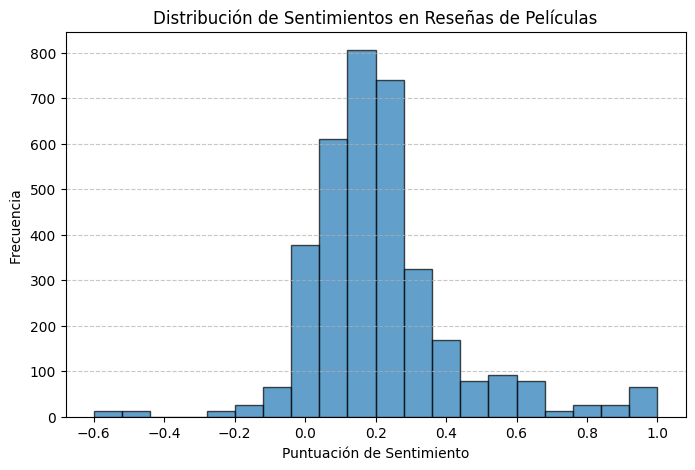

In [12]:
import matplotlib.pyplot as plt

# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ SELECT sentiment_score FROM reviews;
 """ # Seleccionamos los datos de la tabla reseñas.

# Ejecutamos la consulta y almacenar el resultado en un DataFrame
df_sentimientos = pd.read_sql_query(query, conn)

# Creamos el histograma
conn.close()
plt.figure(figsize=(8, 5))
plt.hist(df_sentimientos["sentiment_score"], bins=20, edgecolor="black", alpha=0.7) # Creamos el histograma.
plt.xlabel("Puntuación de Sentimiento")
plt.ylabel("Frecuencia ") # Nº de veces que se repite la puntuación.
plt.title("Distribución de Sentimientos en Reseñas de Películas")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Cerramos la conexión
conn.close()

#### Análisis:

El análisis de las reseñas nos indica que la mayoría de los comentarios son positivos, con un pico de puntuaciones de sentimiento alrededor de 0.1 y 0.3. Esto nos índica que los espectadores generalmente están conforme con las películas la base de datos. Aunque también hay un número pequeño de reseñas con puntuaciones negativas, lo que indica que algunas películas han recibido críticas desfavorables. Comparando estos datos con las calificaciones de IMDb, podemos analizar si hay coherencia entre la puntuación y la percepción general del público. 

---

---
### Adicional: Listar los 10 actores y directores más frecuentes en las películas.

---

In [13]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ -- Seleccionamos los datos de las tablas actors y movieactors y contamos el número de películas por actor
SELECT a.name AS actor, COUNT(ma.movie_id) AS num_peliculas -- Seleccionamos los datos de las tablas actors y movieactors y contamos el número de películas por actor
FROM Actors a
JOIN MovieActors ma ON a.id = ma.actor_id -- Unimos las tablas por el id del actor.
GROUP BY a.name
ORDER BY num_peliculas DESC
LIMIT 10;
 """ 

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_listar = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_listar)

,actor,num_peliculas
0,Tom Hanks,75
1,Robert De Niro,60
2,Matt Damon,60
3,Harrison Ford,60
4,Mark Hamill,45
5,Leonardo DiCaprio,45
6,Kevin Spacey,45
7,Jack Nicholson,45
8,Ian McKellen,45
9,Elijah Wood,45


---
### Adicional plataformas que tienen más películas disponibles 

---

In [14]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ -- Seleccionamos los datos de las tablas directors y moviedirectors y contamos el número de películas por director
SELECT sp.name AS plataforma, COUNT(DISTINCT ms.movie_id) AS num_peliculas
FROM StreamingPlatforms sp
JOIN MovieStreaming ms ON sp.id = ms.platform_id -- Unimos las tablas por el id de la plataforma.
GROUP BY sp.name
ORDER BY num_peliculas DESC;
 """

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_plataformas = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_plataformas)

,plataforma,num_peliculas
0,Movistar Plus+ Ficción Total,44
1,Filmin,34
2,Amazon Prime Video,30
3,Netflix basic with Ads,27
4,Netflix,27
5,Max,24
6,Netflix Standard with Ads,22
7,Movistar Plus+,22
8,Tivify,16
9,Disney Plus,16


---
### Adicional: Listar las peliculas disponibles en netflix con su valoración.

---

In [15]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ -- Seleccionamos los datos de las tablas movies, ratings, moviestreaming y streamingplatforms y filtramos por Netflix.
SELECT DISTINCT m.title, m.year, m.rank, r.rating_imdb, r.rating_RT, r.rating_metacritic, r.promedio_rating 
FROM movies m
JOIN ratings r ON m.imdb_id = r.imdb_id 
JOIN MovieStreaming ms ON m.imdb_id = ms.movie_id 
JOIN StreamingPlatforms sp ON ms.platform_id = sp.id --  Unimos las tablas por el id de la plataforma.  
WHERE sp.name = 'Netflix'
ORDER BY r.promedio_rating DESC;
 """ 

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_netflix = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_netflix)

,title,year,rank,rating_imdb,rating_RT,rating_metacritic,promedio_rating
0,The Godfather,1972,2,9.2,9.7,10.0,9.63
1,Grave of the Fireflies,1988,46,8.5,10.0,9.4,9.30
2,Spirited Away,2001,31,8.6,9.6,9.6,9.27
3,Pulp Fiction,1994,8,8.9,9.2,9.5,9.20
4,Saving Private Ryan,1998,25,8.6,9.4,9.1,9.03
5,The Dark Knight,2008,3,9.0,9.4,8.4,8.93
6,Whiplash,2014,43,8.5,9.4,8.9,8.93
7,Spider-Man: Into the Spider-Verse,2018,67,8.4,9.7,8.7,8.93
8,Spider-Man: Across the Spider-Verse,2023,18,8.5,9.5,8.6,8.87
9,The Shawshank Redemption,1994,1,9.3,8.9,8.2,8.80


---
### Adicional: Películas con más recaudación 

---

In [24]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ -- Seleccionamos los datos de las tablas movies y boxoffice y calculamos la ganancia neta de las películas.
SELECT m.title, b.budget, b.box_office, 
       (b.box_office - b.budget) AS ganancia_neta -- Calculamos la ganancia neta.
FROM movies m
JOIN BoxOffice b ON m.imdb_id = b.imdb_id -- Unimos las tablas por el id de la película.
WHERE b.box_office IS NOT NULL -- Filtramos las películas con recaudación.
ORDER BY ganancia_neta DESC
LIMIT 10;
 """

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_recaudacion = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_recaudacion)

,title,budget,box_office,ganancia_neta
0,Oppenheimer,100.000.000,952.000.000,852.000
1,The Lord of the Rings: The Two Towers,79.000.000,926.287.400,847.287
2,The Lord of the Rings: The Fellowship of the Ring,93.000.000,871.368.364,778.368
3,Star Wars: Episode IV - A New Hope,11.000.000,775.398.007,764.398
4,The Lion King,45.000.000,763.455.561,718.455
5,Inception,160.000.000,839.030.630,679.030
6,Coco,175.000.000,807.816.196,632.816
7,Forrest Gump,55.000.000,677.387.716,622.387
8,Spider-Man: Across the Spider-Verse,100.000.000,690.897.910,590.897
9,Interstellar,165.000.000,746.606.706,581.606


---
### Adicional: Películas Más Rentables en Relación a su Presupuesto
---

In [17]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ -- Seleccionamos los datos de las tablas movies y boxoffice y calculamos el retorno de inversión de las películas.
SELECT m.title, b.budget, b.box_office, 
       ROUND((b.box_office * 1.0 / NULLIF(b.budget, 0)), 2) AS retorno_inversion -- Calculamos el retorno de inversión.
FROM movies m
JOIN BoxOffice b ON m.imdb_id = b.imdb_id -- Unimos las tablas por el id de la película.
WHERE b.budget > 0 AND b.box_office > 0  -- Excluimos películas con presupuesto o recaudación nula.
      AND b.box_office > b.budget  -- Excluir películas con pérdidas
ORDER BY retorno_inversion DESC
LIMIT 10;
 """

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_rentables = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_rentables)

,title,budget,box_office,retorno_inversion
0,Star Wars: Episode IV - A New Hope,11.000.000,775.398.007,70.49
1,The Lives of Others,2.000.000,77.672.685,38.84
2,Rear Window,1.000.000,37.042.336,37.04
3,The Intouchables,13.000.000,426.590.315,32.81
4,"The Good, the Bad and the Ugly",1.200.000,38.900.000,32.42
5,Star Wars: Episode V - The Empire Strikes Back,18.000.000,538.400.000,29.91
6,American Beauty,15.000.000,356.296.601,23.75
7,Parasite,11.363.000,257.591.776,22.67
8,Good Will Hunting,10.000.000,225.900.000,22.59
9,Indiana Jones and the Raiders of the Lost Ark,18.000.000,389.925.971,21.66


---
## Paso 5: Análisis Estadístico Descriptivo
---


### Comparar la distribución de calificaciones según cada fuente.

1. Resumen general de ratings calculando mediana, desviación estandar y valores max y min.
---

In [18]:
# Cargamos los datos de valoraciones normalizadas desde CSV
df_ratings = pd.read_csv("../data/normalizar_ratings.csv")

resumen= df_ratings[['rating_imdb', 'rating_RT', 'rating_metacritic', 'promedio_rating']].describe()

print("Resumen Estadístico de Valoraciones: \n ")
print(resumen)


Resumen Estadístico de Valoraciones: 
 
       rating_imdb   rating_RT  rating_metacritic  promedio_rating
count   100.000000  100.000000          97.000000       100.000000
mean      8.517000    9.148000           8.325773         8.669000
std       0.214643    0.718511           1.139561         0.589842
min       8.300000    6.800000           5.700000         7.000000
25%       8.400000    8.850000           7.600000         8.352500
50%       8.500000    9.300000           8.500000         8.800000
75%       8.600000    9.700000           9.200000         9.100000
max       9.300000   10.000000          10.000000         9.630000


Análisis:
1. Número de datos, count:
    - IMDb y RT tiene valoraciones de 100 pelíuclas, sin embargo Metacritic solo para 97.
2. Proemedio, mean:
    - IMDb: 8.517
    - RT: 9.148 -> Las valoraciones suelen ser mayores que en las otras fuentes.
    - Metacritic: 8.32 -> Es la fuente más crítica.
3. Desviación Estándar, std:
    - IMDb tiene valoraciones muy similares, como veremos más tarde en los gráficos.
    - RT, 0.71, lo que nos dice que las valoraciones son más variables.
    - Metacritic, es la más amplia con un 1.13, lo que nos indica que hay películas con valoraciones muy diferentes.
4. Rago de valoraciones, min/max:
    - IMDb entre 8.3 y 9.3, valoraciones altas y estables.
    - RT entre 6.8 y 10, rango más amplico, con algunas valoraciones muy bajas.
    - Metacritic entre 5.7 y 10 tiene valoraciones mucho más bajas.
5. Quartiles:
    - IMDb es la fuente más estable, con valoraciones muy concentradas.
    - RT tiene la mediana más alta, lo que nos indica que la mitad de las películas tienen valoraciones muy altas.
    - Metacritic tienen la mediana mas baja, mostrando así que sus valoraciones son duras.

---
2. Histogramas para Comparar la Distribución de Calificaciones.
---


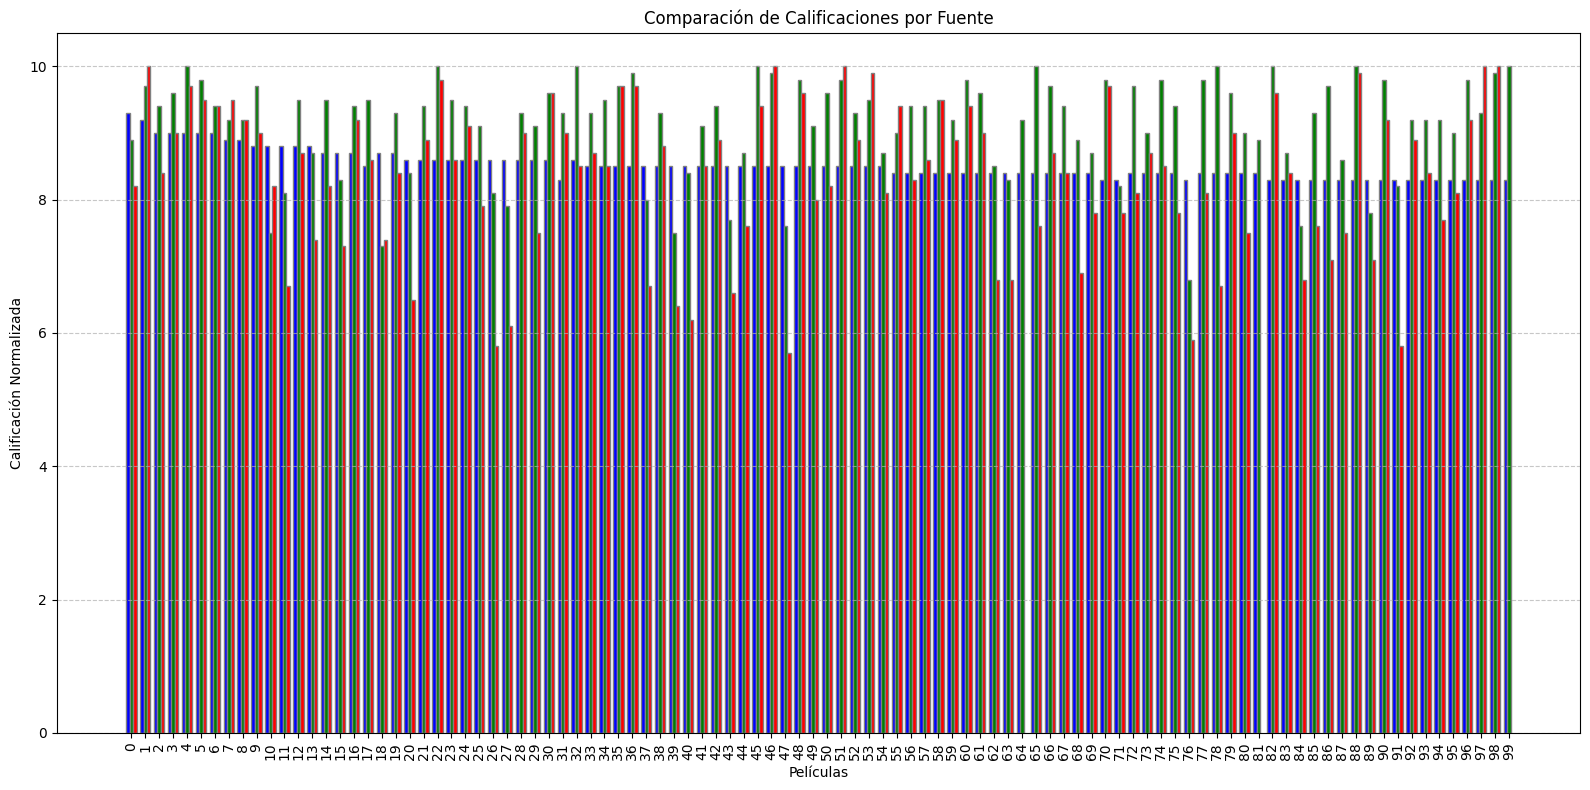

In [19]:
import numpy as np

n = len(df_ratings) 
r = np.arange(n) # Creamos un array con los valores de n.
width = 0.25 # Ancho de las barras.

plt.figure(figsize=(16, 8))

plt.bar(r, df_ratings['rating_imdb'], color='blue', width=width, edgecolor='grey', label='IMDb') # Creamos las barras Imdb.
plt.bar(r + width, df_ratings['rating_RT'], color='green', width=width, edgecolor='grey', label='Rotten Tomatoes') # Creamos las barras de Rotten Tomatoes.
plt.bar(r + 2 * width, df_ratings['rating_metacritic'], color='red', width=width, edgecolor='grey', label='Metacritic') # Creamos las barras de Metacritic.

plt.xlabel("Películas")
plt.ylabel("Calificación Normalizada")
plt.title("Comparación de Calificaciones por Fuente")
plt.xticks(r + width, df_ratings.index, rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
3. Boxplot para Comparación de Dispersión

---

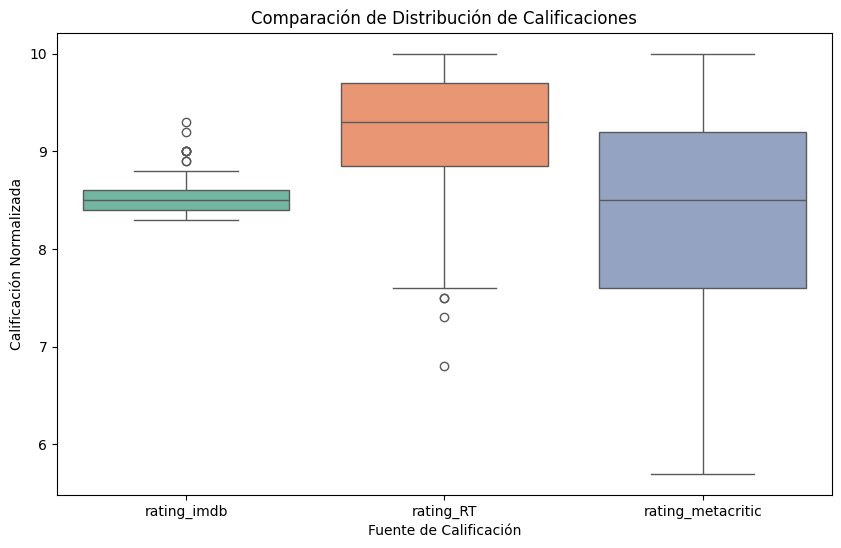

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ratings[['rating_imdb', 'rating_RT', 'rating_metacritic']], palette="Set2") # Creamos el boxplot.   
plt.xlabel("Fuente de Calificación")
plt.ylabel("Calificación Normalizada")
plt.title("Comparación de Distribución de Calificaciones")
plt.show()

* IMDb: 
    - Distribución compacta con poca variabilidad.
    - Valoraciones altas y centradas alrededor de 8.5.
    - Hay valores atípicos por encima, lo que indica algunas películas con valoraciones más altas.
* Rotten Tomatoes:
    - Mayor dispersión de valoraciones.
    - La mediana es más alta, lo que nos indica que la mayoría de las películas tienen buenas valoraciones.
    - Tiene varios valores atípicos por debajo, lo que indica que algunas películas tienen valoraciones significativamente más bajas.
* Metacritic:
    - La distribución de valoraciones de Metacritic también es mucho más amplia, pero con una mediana inferior a la de RT.
* Comparación general:
    - Las tres fuentes muestran valoraciones altas.
    - Podemos ver que Imdb teniendo menos dispersión de calificaciones, muestra casi la misma mediana que Metacritic, que si que tiene mayor dispersión.

        

---
4. Cálculo de Correlaciones entre Calificaciones
---

Matriz de Correlación:


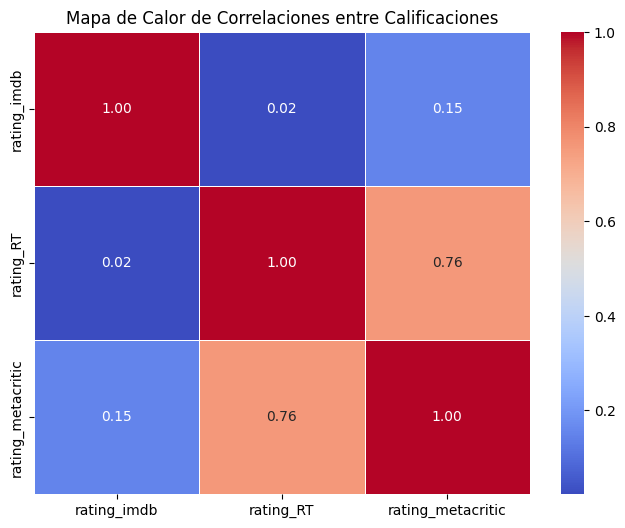

In [21]:

correlation_matrix = df_ratings[['rating_imdb', 'rating_RT', 'rating_metacritic']].corr()
print("Matriz de Correlación:")


# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # Creamos el mapa de calor.
plt.title("Mapa de Calor de Correlaciones entre Calificaciones")
plt.show()


- IMDb / Rotten Tomatoes (0.2, poca correlación):
    * IMDb y RT no tienen relación fuerte.
    * Significa que las películas pueden tener un calificación alta en IMDb pero baja en RT y viceversa.
    * Probablemente porque IMDb usa un sistema de votación abierto mientras que RT se basa en críticas profesionales.
- IMDB / Metacritic (0.15, baja correlación):
    * Aunque un poco mayor que RT, IMDb y Metacritic siguen sin estar muy relacionados.
    * Puede indicar que los usuarios de IMDb tienen una percepción diferente a la de los críticos de Metacritic.
- Rotten Tomatoes / Metacritic (0.76, alta correlación):
    * Hay una fuerte relación positiva entre RT y Metacritic.
    * Esto nos indica que las películas bien valoradas en Rotten Tomatoes suelen recibir buenas calificaciones en Metacritic y viceversa.
    * Ambos usan críticas de expertos, lo que explicaría la similitud.

En definitiva, no podemos predecir la calificación de IMDb basándonos en Rotten Tomatoes o Metacritic.

---
### Evaluar discrepancias entre IMDb, Rotten Tomatoes y Metacritic.
---

In [22]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ SELECT m.title, r.rating_imdb, r.rating_RT, r.rating_metacritic, -- Seleccionamos los datos de las tablas movies y ratings y calculamos las diferencias entre las calificaciones.
    (r.rating_imdb - r.rating_RT) AS diff_imdb_rt, -- Diferencia entre IMDb y Rotten Tomatoes
    (r.rating_imdb - r.rating_metacritic) AS diff_imdb_metacritic, -- Diferencia entre IMDb y Metacritic
    (r.rating_RT - r.rating_metacritic) AS diff_rt_metacritic -- Diferencia entre Rotten Tomatoes y Metacritic
FROM movies m
JOIN ratings r ON m.imdb_id = r.imdb_id -- Unimos las tablas por el id de la película.
ORDER BY diff_imdb_rt DESC
LIMIT 10;
 """

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_discrepancias = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_discrepancias)

,title,rating_imdb,rating_RT,rating_metacritic,diff_imdb_rt,diff_imdb_metacritic,diff_rt_metacritic
0,Joker,8.3,6.8,5.9,1.5,2.4,0.9
1,Interstellar,8.7,7.3,7.4,1.4,1.3,-0.1
2,Forrest Gump,8.8,7.5,8.2,1.3,0.6,-0.7
3,Léon: The Professional,8.5,7.5,6.4,1.0,2.1,1.1
4,The Intouchables,8.5,7.6,5.7,0.9,2.8,1.9
5,The Prestige,8.5,7.7,6.6,0.8,1.9,1.1
6,Fight Club,8.8,8.1,6.7,0.7,2.1,1.4
7,Braveheart,8.3,7.6,6.8,0.7,1.5,0.8
8,The Green Mile,8.6,7.9,6.1,0.7,2.5,1.8
9,Requiem for a Dream,8.3,7.8,7.1,0.5,1.2,0.7


- IMDb tiende a ser la fuente más generosa, reflejando la opinión del público en general.
- Rotten Tomatoes y Metacritic tienen discrepancias menores, pero Metacritic suele ser más duro.
- Algunas películas tienen diferencias extremas, lo que sugiere una gran división entre la audiencia y los críticos.

---
### Relacionar análisis de sentimientos con calificaciones de usuarios.

---

In [23]:
# Nos conectamos a la base de datos SQLite
conn = sqlite3.connect("../database/movies.db")

# Definimos la consulta SQL
query = """ SELECT m.title, r.rating_imdb, rating_RT, rating_metacritic,promedio_rating, -- Seleccionamos los datos de las tablas movies y ratings y calculamos el promedio de las calificaciones.
    AVG(rv.sentiment_score) AS avg_sentiment -- Calculamos el promedio de los sentimientos.
FROM movies m
JOIN ratings r ON m.imdb_id = r.imdb_id -- Unimos las tablas por el id de la película.
JOIN reviews rv ON m.imdb_id = rv.imdb_id -- Unimos las tablas por el id de la película.
GROUP BY m.title  -- Agrupamos por título de la película.
ORDER BY avg_sentiment DESC;
 """

# Ejecutamos la consulta y almacenamos el resultado en un DataFrame
df_relacion = pd.read_sql_query(query, conn)

# Cerramos la conexión
conn.close()

# Mostramos los resultados 
display(df_relacion)

,title,rating_imdb,rating_RT,rating_metacritic,promedio_rating,avg_sentiment
0,3 Idiots,8.4,10.0,6.7,8.37,1.000000
1,Forrest Gump,8.8,7.5,8.2,8.17,0.738956
2,The Shawshank Redemption,9.3,8.9,8.2,8.80,0.691852
3,Toy Story 3,8.3,9.8,9.2,9.10,0.566229
4,Toy Story,8.3,10.0,9.6,9.30,0.486155
...,...,...,...,...,...,...
94,Apocalypse Now,8.4,9.0,9.4,8.93,-0.027312
95,American History X,8.5,8.4,6.2,7.70,-0.031894
96,M,8.3,10.0,NaN,9.15,-0.053086
97,Alien,8.5,9.3,8.9,8.90,-0.084293


- En general, las calificaciones y el sentimiento de usuarios están alineados, pero hay alguanas excepciones.
- Películas con temática dura o controversial pueden recibir calificaciones altas pero sentimientos negativos en las reseñas.
- Algunas películas con baja calificación tienen reseñas más positivas, lo que indica que la percepción del público es diferente a la de los críticos.

---
## Paso 6: Creación del Dashboard en Power BI

---

---
1. Tabla resumen de películas con sus calificaciones.  

---

![Tabla Resumen Películas](../images/Tabla%20Resumen%20Películas.png)


1. Funcionalidades:
    - Ranking de películas.
        * Muestra el puesto de cada película, en este caso ordenado de manera ascendente hasta 100.
        * Siendo útil para identificar rapidamente las películas más destacas.
    - Año de estreno.
        * Para comparar películas clásicas vs películas recientes.
    - Valoraciones en diferentes webs.
        * Para comparar y tener feedback de lo que otros usuarios piensan sobre cada película.
    - Actores Principales y Director.
        * Muchos espectadores, ven películas por el simple hecho de que algún actor en concreto aparezca, gracias a este power bi, se podría conseguir.
        * Del mismo modo ocurre con el director, en muchos casos un buen filtro para saber si esa película merece la pena es por el director.
2. Utilidades:
    - Para cinéfilos, descubrir las películas mejor valoradas y explorar clásicos o novedades.
    - Para analistas de datos, comparar calificaciones de diferentes plataformas y detectar discrepancias.
    - Para estudios de cine, evaluar qué directores y actores dominan las listas de las mejores películas.
    - Para recomendaciones personalizadas, filtrar por actores, directores o año para encontrar películas de interés.
    

---
2. Comparación de ratings por fuente. 

---

![Comparación de Rating por Fuente](../images/Comparación%20de%20Rating%20por%20Fuente.png)

1. Funcionalidades:
    - Segmentador.
        * Gracias al segmentador de películas, podemos analizar diferentes datos de una película en concreto de forma dinámica.
        * Al seleccionar una película, los datos se actualizan automaticamente.
    - Grafico de Barras.
        * Se muestran las valoraciones de diferentes Webs y el ranking en el que se encuentra la película.
        * No sirve de ayuda para ver discrepancias entre las diferentes webs.
    - Información financiera.
        * Gracias a este apartado podemos analizar si la película ha sido rentable o no.
    - Portada.
        * Esta nos ayuda a idenitificar visualmente la pelicula seleccionada.
2. Utilidades.
    - Interacción Dinámica, seleccionando una película y ver sus estadísticas en tiempo real.
    - Comparación de Calificaciones, así vemos cómo diferentes plataformas valoran la misma película.
    - Análisis Financiero, Identificando las películas exitosas en términos de ganancias.
    - Exploración Visual, facilitando la navegación con imágenes y datos claros.

---
3. Gráfico de barras de las 10 películas mejor valoradas. 

---

![10 Películas Mejor Valoradas](../images/películas_mejor_valoradas.png)

1. Funcionalidades:
    - Gráfico de Barras.
        * Muestra las 10 películas con mayor promedio de valoración, ordenadas de mayor a menor.
    - Gráfico de Anillo.
        * Así podemos ver que porcentaje tiene la valoracion que han dado las webs.
        * También podríamos analizar si existe una tnedencia en ciertas webs.
2. Utilidades:
    - Para cinéfilos, permite identificar películas recomendadas.
    - Para analistas de datos, comparando cómo cada plataforma califica una misma película.
    - Para estudios de cine, observando tendencias y patrones en la crítica cinematográfica.


---
4. Visualización de análisis de sentimiento.

---

![Análisis de Sentimiento](../images/Analisis_sentimiento_valoracion.png)

1. Funcionalidades:
    - Gráfico de dispersión.
        * Permite identificar la película por su valoraciñon y por el sentimiento de las reseñas, sindo 1 muy buena reseña y -1 muy mala reseña.
    - Tabla de información.
        * Que nos da una breve descripción de la película junto a en que plataformas está disponible esa película.
2. Utilidades:
    - Para analistas de datos, vemos la relación entre valoración objetiva y percepción subjetiva.
    - Para cineastas y productores, se entiende cómo una película es recibida emocionalmente.  
    - Para marketers, identificando películas que generan debate y engagement.
